# Patch the Planet: Restore Missing Images - Starter Notebook

Welcome to the Patch the Planet Challenge, which explores the geophysical machine learning space. For this challenge, you will be given a series of 3D seismic volumes, both synthetically generated and real, and asked to fill in a missing section of the volume using a machine learning or deep learning solution.

### Supplied Materials:

* Starter Notebook
* Training data: 500 synthetic 3D seismic volumes, 50 real 3D seismic volumes
* Test data: 15 synthetic 3D seismic volumes
* `utils.py` script containing training data generation code, scoring function, and submission file generation code.
* `requirements.txt` for all required packages

### Data

The data is comprised of a training dataset and a test dataset. The training dataset consists of 500 synthetic 3D seismic volumes and 50 real 3D seismic volumes. Each volume has a shape of `(300,300,1259)`. The 500 synthetic volumes and 50 real volumes are provided as is. It will be the participants job to generate their own training data using the `training_data_generator` function provided in the `utils` script. This function allows participants to experiment with the size of the blank section in the training volumes. Participants are free to use as much synthetic and/or real data as needed. Participants are also free to slice and dice the training volumes to use in their models. The challenge will be scored using the 15 synthetic 3D seismic volumes with a shape of `(300,300,1259)` and 25% of the volume blanked out.

### Training Data Generation

For this challenge, you will be given code that allows you to build your own training data. Below is an example of how to use the `training_data_generator` function and examples of the outputs. Please remember to include any packages used in the `requirements.txt` file included in the starter notebook folder.

In [21]:
# ONLY RUN THIS CELL ONCE
#!pip install -r requirements.txt

In [1]:
import numpy as np
from typing import Literal
import matplotlib.pyplot as plt
from glob import glob
from utils import training_data_generator, scoring, create_submission, create_single_submission

In [2]:
seismic_data = np.load('./example_data/example_seis_vol_2.npy')
seismic, target, target_mask = training_data_generator(seismic=seismic_data, axis='i_line', percentile=25)

Below is an example of the `training_data_generator()` outputs: `seismic`, `target`, and `target_mask`. `seismic` is the 3D seismic volume that was provided in the training dataset, but with a specified percentage of missing section (defined by `percentile` in the function). `target` is the seismic data contained in the missing section. `target_mask` is a binary mask identifying where in the 3D volume the missing section exists.

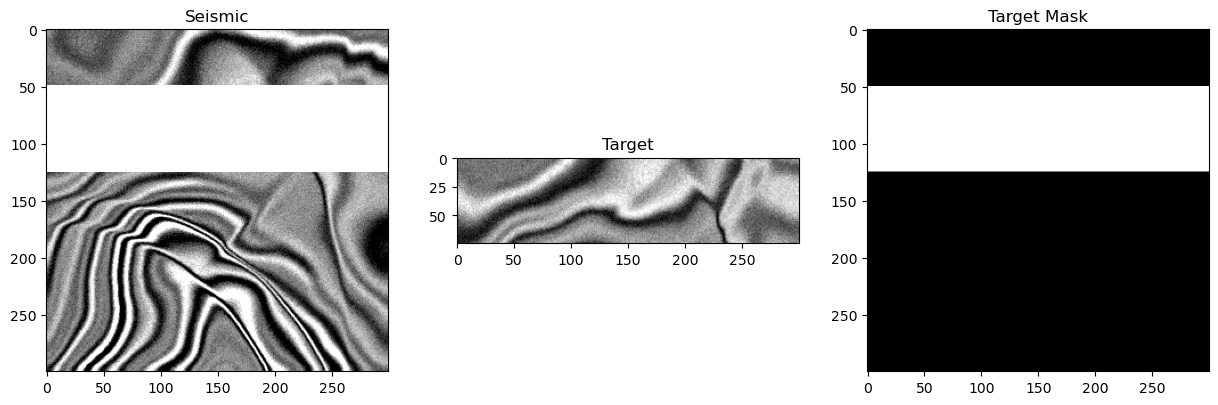

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(seismic[...,500], cmap='gray')
ax[0].set_title('Seismic')
ax[1].imshow(target[...,500], cmap='gray')
ax[1].set_title('Target')
ax[2].imshow(target_mask[...,500], cmap='gray')
ax[2].set_title('Target Mask')
plt.show()

### Solution

In [4]:
%%time
# YOUR SOLUTION HERE

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs


### Submission File Generation

The Onward team has provided challengers with submission file generation code, which can be found in the `utils.py` script. There are two functions provided that will be useful; `create_single_submission()` and `create_submission()`.

`create_single_submission()` allows challengers to create a single submission file for any number of volumes. This should be used for testing purposes. Once a challenger has predictions from their model, they can create a single submission file to test in the scoring function provided in the `Evaluation` section. 

`create_submission()` should be used as the final output submission file for challengers to provide to the scoring page.

Below is an example of how one might load some training data into the `training_data_generator()` and create a submission file. While we encourage testing of the submission file generation and scoring code using training data, the final submission will be generated using the 15 test volumes provide with 25% missing sections. 

In [5]:
predictions_path = './example_data/' # Path to your predictions folder or training data folder
seismic_filenames = [f.split('/')[2] for f in glob(f"{predictions_path}*")]

predictions = []
for seismic_filename in seismic_filenames:
    seismic = np.load(f"{predictions_path}{seismic_filename}")
    _, target, _ = training_data_generator(seismic, axis=None, percentile=25)
    predictions.append(target)
    print(seismic_filename, 'loaded')

example_seis_vol_1.npy loaded
example_seis_vol_2.npy loaded


Creating a single submission method for testing

In [6]:
for seismic_filename, target in zip(seismic_filenames, predictions):
    create_single_submission(seismic_filename, prediction=target, submission_path='./submission_files/example_submission1.npz')

Creating the final submission method

In [7]:
create_submission(seismic_filenames, prediction=predictions, submission_path='./submission_files/example_submission2.npz')

### Evaluation

The leaderboard evaluation will use the `scikit-image` implementation of the [Structural Similarity Index](https://scikit-image.org/docs/stable/auto_examples/transform/plot_ssim.html). The Structural Similarity Index is a metric used to measure the similarity between two images. When the SSI equals 1, the images are identical. When the SSI equals 0, the images are completely dissimilar. Please refer to the `scikit-image` docs for more information about the metric, as well as examples for implementaion. Because we are using the same volumes for predicition and ground-truth below, the SSI = 1.0.

In [8]:
score = scoring('./submission_files/example_submission1.npz', './submission_files/example_submission2.npz')
print(f"Structural Similarity Score: {score}")

Structural Similarity Score: 1.0
